In [19]:
import numpy as np
import pandas as pd

Regularized Linear Regression:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2  + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2 \tag{1}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$ 


Without Regularization:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 

The difference:  <span style="color:red">
    $\frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$ </span> 
    
Minimizes the size of the parameters. B is not regularized (standard practice)


In [20]:
#regularized cost 
def calculate_cost(x_values, y_values, w_values, b, lambda_ = 1):
    m  = x_values.shape[0]
    n  = len(w_values)
    total_cost = 0
    for i in range(m):
        f_i = np.dot(x_values[i], w_values) + b                                  
        total_cost += (f_i - y_values[i])**2                                      
    total_cost =  1 / (2 * m) * total_cost                                  
    
    regularized_cost = 0
    for j in range(n):
        regularized_cost += (w_values[j]**2)                                         
    regularized_cost = (lambda_/(2*m)) * regularized_cost                             
    
    total_cost = total_cost + regularized_cost                                       
    return total_cost                           

### Computing the Gradient with regularization (both linear/logistic)
The gradient calculation for linear and logistic regression:
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m: training examples
* $f_{\mathbf{w},b}(x^{(i)})$ : prediction
* $y^{(i)}$ : target

   
   
   
<span style="color:red"> **Linear** </span> regression model  
    * $f_{\mathbf{w},b}(x) = \mathbf{w} \cdot \mathbf{x} + b$  
    
<span style="color:red"> **Logistic** </span> regression model  
    * $z = \mathbf{w} \cdot \mathbf{x} + b$  
    * $f_{\mathbf{w},b}(x) = g(z)$  
    * $g(z)$ : sigmoid function  
    * $g(z) = \frac{1}{1+e^{-z}}$   
    

In [21]:

def calculate_gradient_descent(x_values, y_values, w_values, b,lambda_): 
    
    m,n = x_values.shape     
    #m : examples ; n: features 
    derivatives_w = np.zeros(n)
    derivative_b = 0

    for i in range(m):                             
        error = (np.dot(x_values[i], w_values) + b) - y_values[i] 
        for j in range(n):                         
            derivatives_w[j] = derivatives_w[j] + error * x_values[i, j]    
        derivative_b += error
        
    derivative_b /= m
    derivatives_w /= m

    for j in range(n):
        derivatives_w[j] = derivatives_w[j] + (lambda_/m) * w_values[j]

    return derivative_b, derivatives_w

In [22]:
import copy

def gradient_descent(x_values, y_values, w_initial_values, b_initial, cost_function, gradient_function, alpha, iterations, lambda_): 
    

    cost_cache = []
    w_values = copy.deepcopy(w_initial_values)  
    b = b_initial
    for i in range(iterations):

        derivative_b,derivatives_w = gradient_function(x_values, y_values, w_values, b, lambda_)   

        w_values = w_values - alpha * derivatives_w              
        b = b - alpha * derivative_b
        
        if i<100000:
            cost_cache.append(cost_function(x_values, y_values, w_values, b, lambda_))
            
    return w_values, b, cost_cache 

In [23]:
df = pd.read_csv('../data/multipleFeatures.csv')

In [24]:
x = []
y = []
for i in range(df.shape[0]):
    temp = df.iloc[i]
    x.append(temp[0:-1])
    y.append(temp[-1])



In [25]:
x_values = np.array(x)
y_values = np.array(y)

w_initial_values = np.zeros(x_values.shape[1])
b_initial = 0

iterations = 500000
learning_rate = 3.0e-5
lambda_ = 0.1

x_normalized = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

y_normalized = (y - np.mean(y)) / np.std(y)

w_final_values, b_final, cost_cache = gradient_descent(x_normalized, y_normalized, w_initial_values ,b_initial ,
                                                    calculate_cost, calculate_gradient_descent, 
                                                    learning_rate, iterations,lambda_)

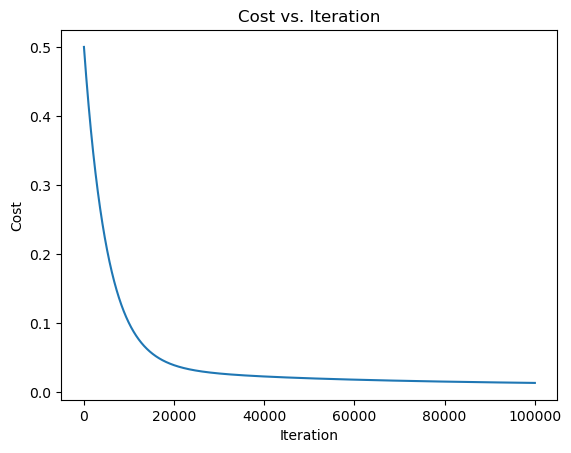

In [26]:


import matplotlib.pyplot as plt
plt.figure()
plt.plot(cost_cache)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()

In [27]:
new_data = pd.DataFrame({'area': [3000, 2000], 'bedrooms': [3, 2], 'bathrooms': [2, 1], 'age': [1, 2]})
new_data_values = new_data.values

In [28]:

x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

new_data_normalized = (new_data_values - x_mean) / x_std

prediction_normalized = np.dot(new_data_normalized, w_final_values) + b_final

predictions_custom = prediction_normalized * y_std + y_mean

predictions_custom


array([431394.36802277, 239655.97906882])

In [29]:

y_pred_normalized = np.dot(np.array(x_normalized),w_final_values) + b_final

y_pred = y_pred_normalized * np.std(y) + np.mean(y)

print(y_pred)

print(y)

[329855.18296783 247275.75271055 446391.65483579 307762.54520022
 499935.67753463 338779.18675097]
[320000, 250000, 450000, 300000, 500000, 350000]


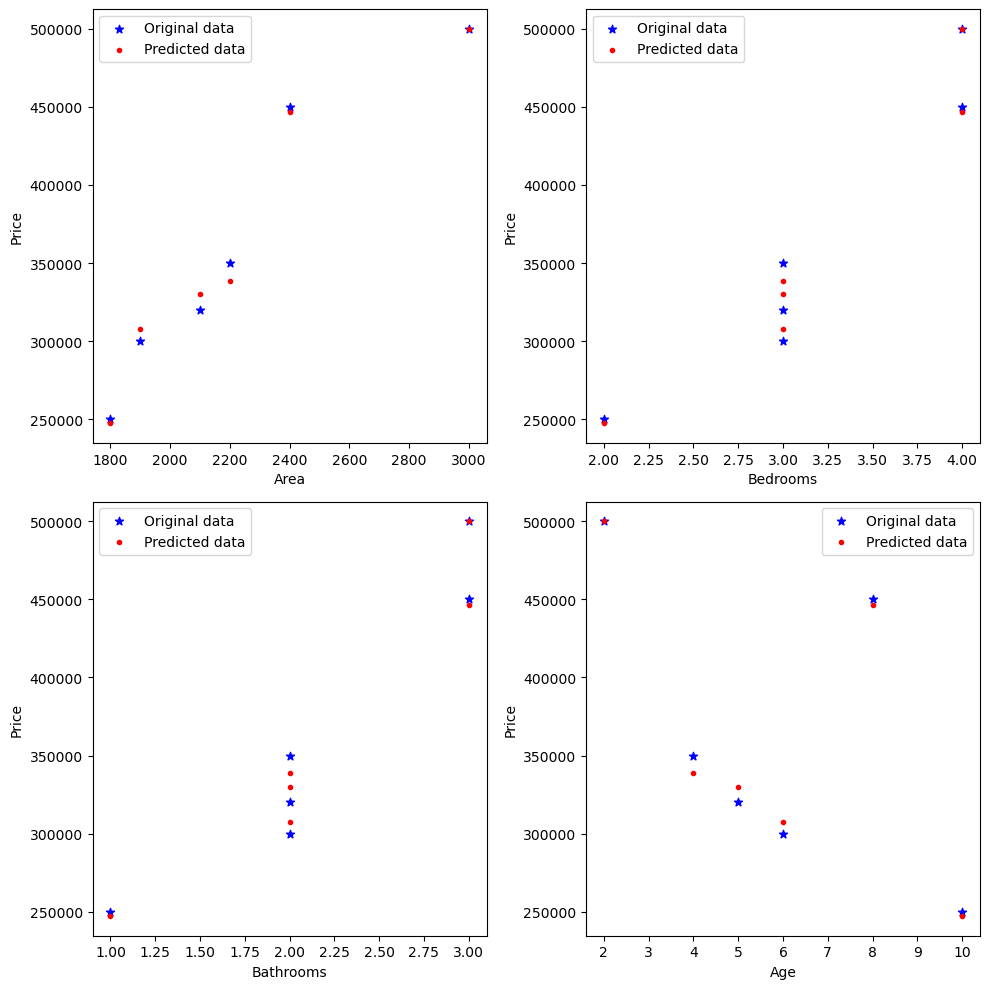

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#plotting for area feature
axs[0, 0].scatter(np.array(x)[:,0], y, color='blue', marker='*', label='Original data')
axs[0, 0].scatter(np.array(x)[:,0], y_pred, color='red', marker='.', label='Predicted data')
axs[0, 0].set_xlabel('Area')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend()

#plotting for bedrooms feature
axs[0, 1].scatter(np.array(x)[:,1], y, color='blue', marker='*', label='Original data')
axs[0, 1].scatter(np.array(x)[:,1], y_pred, color='red', marker='.', label='Predicted data')
axs[0, 1].set_xlabel('Bedrooms')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()

#plotting for bathrooms feature
axs[1, 0].scatter(np.array(x)[:,2], y, color='blue', marker='*', label='Original data')
axs[1, 0].scatter(np.array(x)[:,2], y_pred, color='red', marker='.', label='Predicted data')
axs[1, 0].set_xlabel('Bathrooms')
axs[1, 0].set_ylabel('Price')
axs[1, 0].legend()

#plotting for age feature
axs[1, 1].scatter(np.array(x)[:,3], y, color='blue', marker='*', label='Original data')
axs[1, 1].scatter(np.array(x)[:,3], y_pred, color='red', marker='.', label='Predicted data')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Price')
axs[1, 1].legend()

# displaying the figure with subplots
plt.tight_layout()
plt.show()
